Model that predicts men and women from chin x-ray images (Çene röntgeni görüntülerden kadın erkek tahmin eden model)

In [ ]:

from google.colab import drive
drive.mount('/gdrive/')

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Mounted at /gdrive/


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12516957832107392955
 xla_global_id: -1]

In [ ]:
import os

os.chdir("/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/CTanima")
os.listdir('/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/')

['mnist_projesi', 'CTanima', 'spark', 'save_models']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

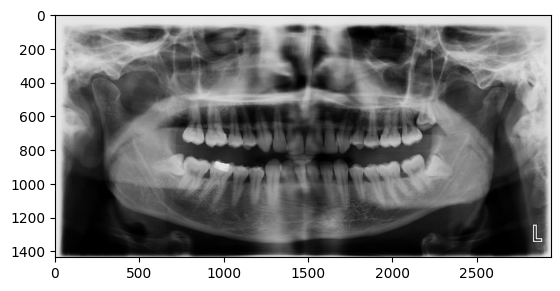

In [ ]:
DATADIR = "/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/CTanima"
CATEGORIES = ["E","K"]

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break

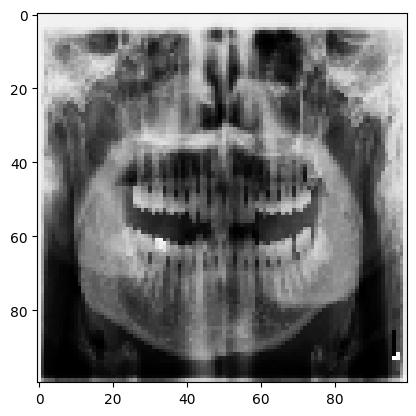

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
print(len(training_data))

422


In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

1
0
1
0
1
1
0
1
1
0


In [ ]:
X = []
y = []

for features,label in training_data:
  X.append(features)
  y.append(label)

X= np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

`pickle`, Python programlamada nesnelerin (örneğin, listeler, sözlükler, sınıflar gibi) seri hâle getirilip (pickling) dosyalara veya ağ üzerinden aktarılmasını sağlayan bir modüldür. Bu işlem sayesinde nesneleri daha sonra program yeniden çalıştırıldığında aynı hâle getirebilirsiniz (unpickling). **Bu, veri saklamanın ve daha sonra kullanmanın yaygın bir yoludur.** Özellikle, büyük veri yapıları veya öğrenme modelleri gibi bellekte büyük miktarda veri işlediğinizde oldukça kullanışlıdır.

In [ ]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [ ]:
print(X.shape)

(422, 100, 100, 1)


(422, 100, 100, 1)- 422 tane 100x100 1 kanallı görüntü

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [ ]:
X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X= X/255.0

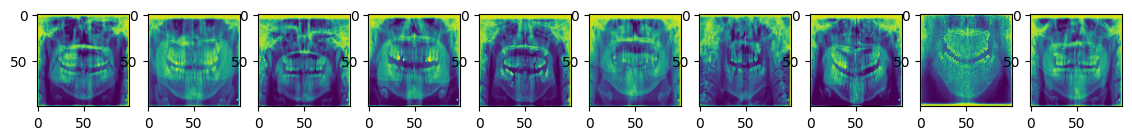

In [ ]:
plt.figure(figsize=(14,14))
x, y = 10, 1
for i in range(10):
    plt.subplot(y, x, i+1)
    plt.imshow(X[i].reshape(IMG_SIZE,IMG_SIZE))
plt.show()

In [ ]:
!pip install -q keras
!pip install -q tensorflow
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=87b1106894183ccb9fb8f5ae25937b17cc4bc5016f37ddff26931203b7be16da
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")



X = np.array(pickle.load(open("X.pickle", "rb")))
pickle_in = open("y.pickle","rb")
y = np.array(pickle.load(open("y.pickle", "rb")))
print(X.shape)

print(X.shape)
X = X/255.0



model = Sequential()


(422, 100, 100, 1)
(422, 100, 100, 1)


**Sequential**, TensorFlow veya Keras gibi derin öğrenme kütüphanelerinde sıkça kullanılan bir sınıftır. Bu sınıf, **yapay sinir ağlarını oluşturmanızı sağlar.** **Sequential modeli, katmanları sıralı bir şekilde eklemenize ve bunları birbirine bağlamanıza izin verir.**

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape = X.shape[1:]))

model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 flatten (Flatten)           (None, 147456)            0         
                                                                 
 dense (Dense)               (None, 128)               18874496  
                                                      

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:

model.fit(X, y,
          batch_size=16,
          epochs=15,
          verbose=1,
          validation_split=0.1)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


24/24 [==============================] - 27s 1s/step - loss: 0.8655 - accuracy: 0.6596 - val_loss: 0.5960 - val_accuracy: 0.6279
Epoch 2/15
24/24 [==============================] - 26s 1s/step - loss: 0.4999 - accuracy: 0.7652 - val_loss: 0.5475 - val_accuracy: 0.6744
Epoch 3/15
24/24 [==============================] - 30s 1s/step - loss: 0.4152 - accuracy: 0.8047 - val_loss: 0.4452 - val_accuracy: 0.8140
Epoch 4/15
24/24 [==============================] - 21s 871ms/step - loss: 0.3584 - accuracy: 0.8602 - val_loss: 0.4034 - val_accuracy: 0.8140
Epoch 5/15
24/24 [==============================] - 26s 1s/step - loss: 0.2551 - accuracy: 0.9024 - val_loss: 0.3507 - val_accuracy: 0.8372
Epoch 6/15
24/24 [==============================] - 26s 1s/step - loss: 0.1817 - accuracy: 0.9446 - val_loss: 0.3722 - val_accuracy: 0.8140
Epoch 7/15
24/24 [==============================] - 31s 1s/step - loss: 0.1590 - accuracy: 0.9367 - val_loss: 0.3082 - val_accuracy: 0.8605
Epoch 8/15
24/24 [==========

**batch_size parametresinin değeri, bir defada işlenecek örnek sayısını belirtir.** Örneğin, batch_size=16 ise, her iterasyonda (bir eğitim döneminde) model, 16 örneği işleyecektir

In [ ]:
model.save('/test_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
DATADIRtest = "/gdrive/MyDrive/Dersler/Lisans/Veri_Madenciligi/CTanima/test"
CATEGORIEStest = ["E","K"]

test_data=[]

def create_test_data():
  for category in CATEGORIEStest:
    path = os.path.join(DATADIRtest, category)
    class_num = CATEGORIEStest.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        test_data.append([new_array, class_num])
      except Exception as e:
        pass

create_test_data()

In [ ]:
Xtest = []
ytest = []

for featurestest,labeltest in test_data:
  Xtest.append(featurestest)
  ytest.append(labeltest)

Xtest= np.array(Xtest).reshape(-1,IMG_SIZE,IMG_SIZE,1)

Xtest = Xtest/255.0
print(Xtest.shape)

(47, 100, 100, 1)


In [ ]:
score = model.evaluate(Xtest, ytest, verbose=0)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})